In [1]:
import numpy as np
from numpy import array, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../../../utils')
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, \
    plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, \
    HEIGHT, plot_line_chart
from studies import naive_Bayes_study, logistic_regression_study, knn_study, trees_study, mlp_study, \
        run_all_nb, run_all_knn, run_all_lr, run_all_dt, run_all_mlp, run_all_rf, run_all_gb, \
        show_tree_and_importances_dt, show_importances_rf, show_importances_gb

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd


In [2]:
df = pd.read_csv("../data/prepared/best_model.csv")
df.head()

,crash_date,intersection_related_i,damage,num_units,injuries_fatal,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,traffic_control_device_BICYCLE CROSSING SIGN,...,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER,crash_type
0,1.090028,1,-0.913779,-0.163369,0.0,0.654986,-0.066570,1.452049,0.066571,False,...,False,False,False,False,False,True,False,False,False,0
1,1.106410,1,0.597795,-0.163369,0.0,-0.203471,-2.386418,-1.598500,0.358322,False,...,False,False,False,False,False,False,False,False,False,0
2,0.413855,1,-0.913779,2.619242,0.0,0.654986,-0.601920,0.435200,1.525324,False,...,False,False,False,False,False,False,False,False,False,0
3,1.102811,1,0.597795,-0.163369,0.0,-1.920385,1.004129,-0.073225,0.358322,False,...,False,False,False,False,False,True,False,False,False,1
4,1.113899,1,-0.913779,-0.163369,0.0,0.654986,0.111880,1.452049,0.358322,False,...,False,False,False,False,False,False,False,False,False,0


In [3]:
target_name = "crash_type"
file_tag = "traffic"
lab_folder = "lab4_modelling"
approach = "best"

target = df[target_name] #pulling target out before dropping non-numerics
features = df.drop(columns=[target_name])

print(features.info())
print("Features shape:", features.shape)
print("Target shape:", target.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234752 entries, 0 to 234751
Columns: 138 entries, crash_date to prim_contributory_cause_WEATHER
dtypes: bool(129), float64(8), int64(1)
memory usage: 45.0 MB
None
Features shape: (234752, 138)
Target shape: (234752,)


In [4]:
# train/test splitting
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.3,        #.7 train, .3 test
    random_state=42,      
    stratify=target       # keeps class proportions similar in train and test
)

**NAIVE BAYES ANALYSIS - TRAFFIC DATA**

Couldn't run MultinomialNB


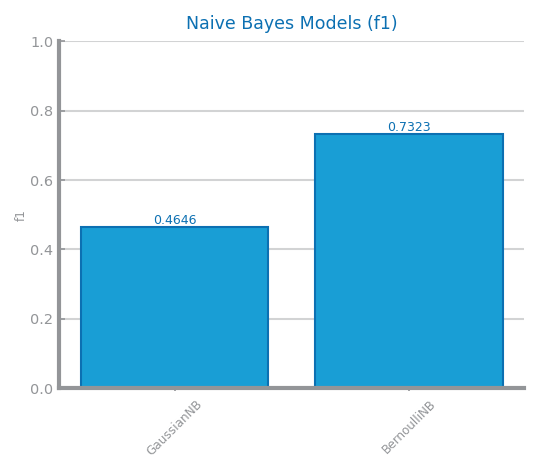

<Figure size 600x450 with 0 Axes>

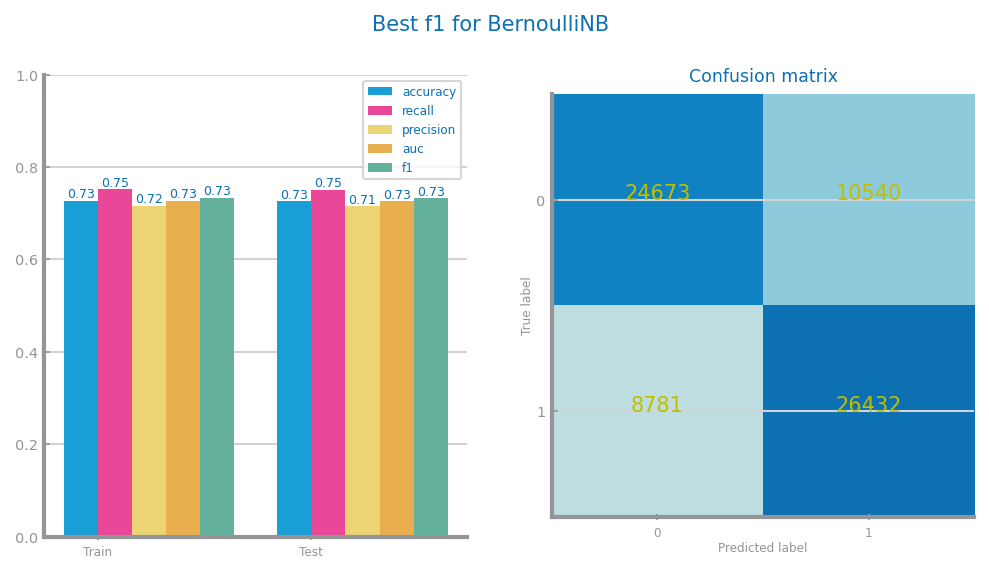

In [5]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    nb_best_model, nb_params = run_all_nb(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        eval_metric = el
    )

In [6]:
print(nb_best_model)
print(nb_params)

BernoulliNB()
{'name': 'BernoulliNB', 'metric': 'f1', 'params': (), 'f1': 0.7323405139571934}


In [ ]:
# BernoulliNB()
# {'name': 'BernoulliNB', 'metric': 'f1', 'params': (), 'f1': 0.7323405139571934}

**LOGISTIC REGRESSION ANALYSIS - TRAFFIC DATA**

LR best for 500 iterations (penalty=l2)


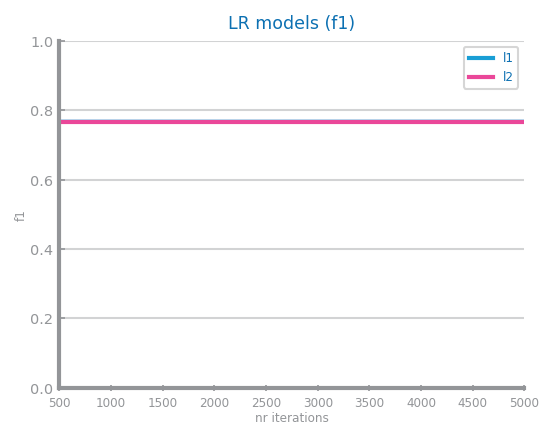

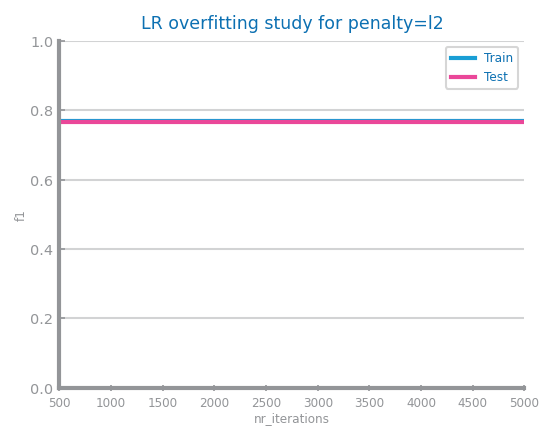

<Figure size 600x450 with 0 Axes>

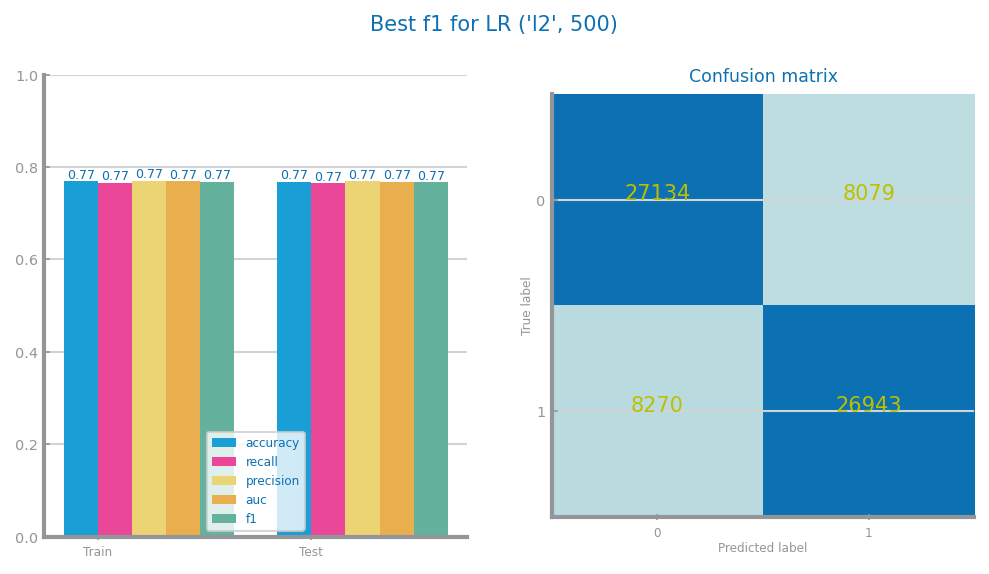

In [7]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    lr_best_model, lr_params = run_all_lr(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_iterations=5000,
        lag=500,
        eval_metric = el
    )

In [8]:
print(lr_best_model)
print(lr_params)

LogisticRegression(max_iter=500, solver='liblinear', verbose=False)
{'name': 'LR', 'metric': 'f1', 'params': ('l2', 500)}


In [ ]:
# LogisticRegression(max_iter=500, solver='liblinear', verbose=False)
# {'name': 'LR', 'metric': 'f1', 'params': ('l2', 500)}

**DECISION TREES ANALYSIS - TRAFFIC DATA**

DT best with gini and d=13


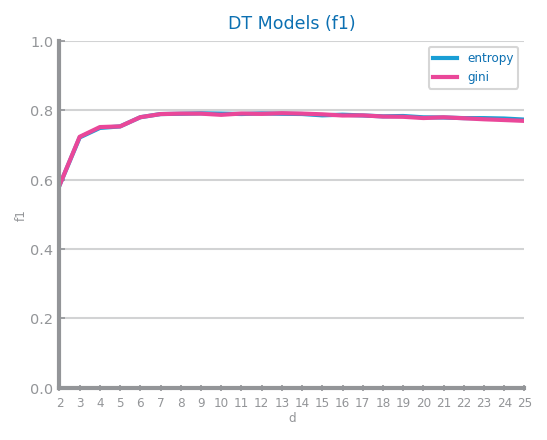

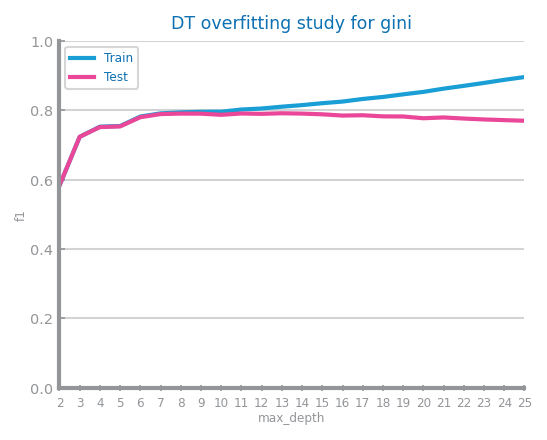

<Figure size 600x450 with 0 Axes>

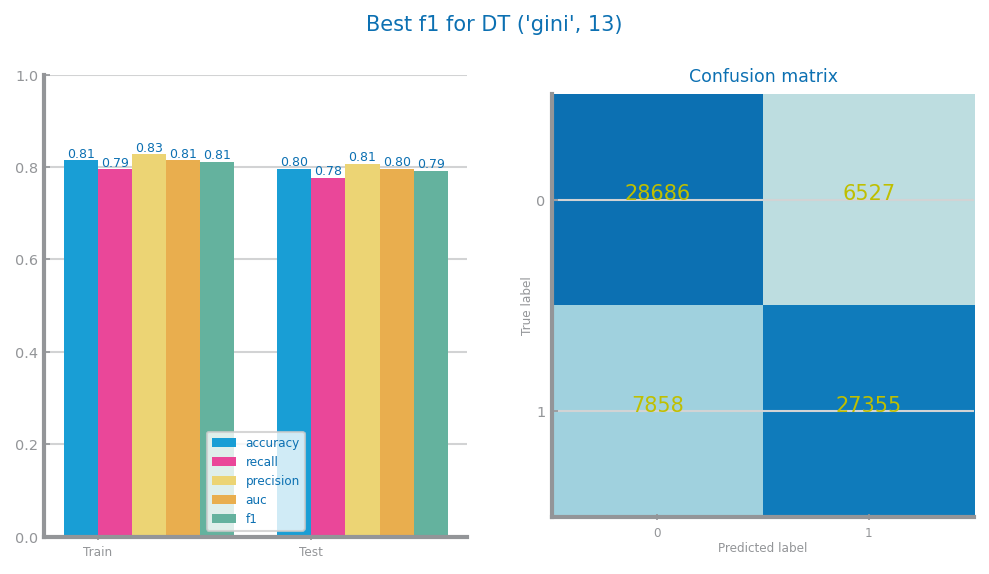

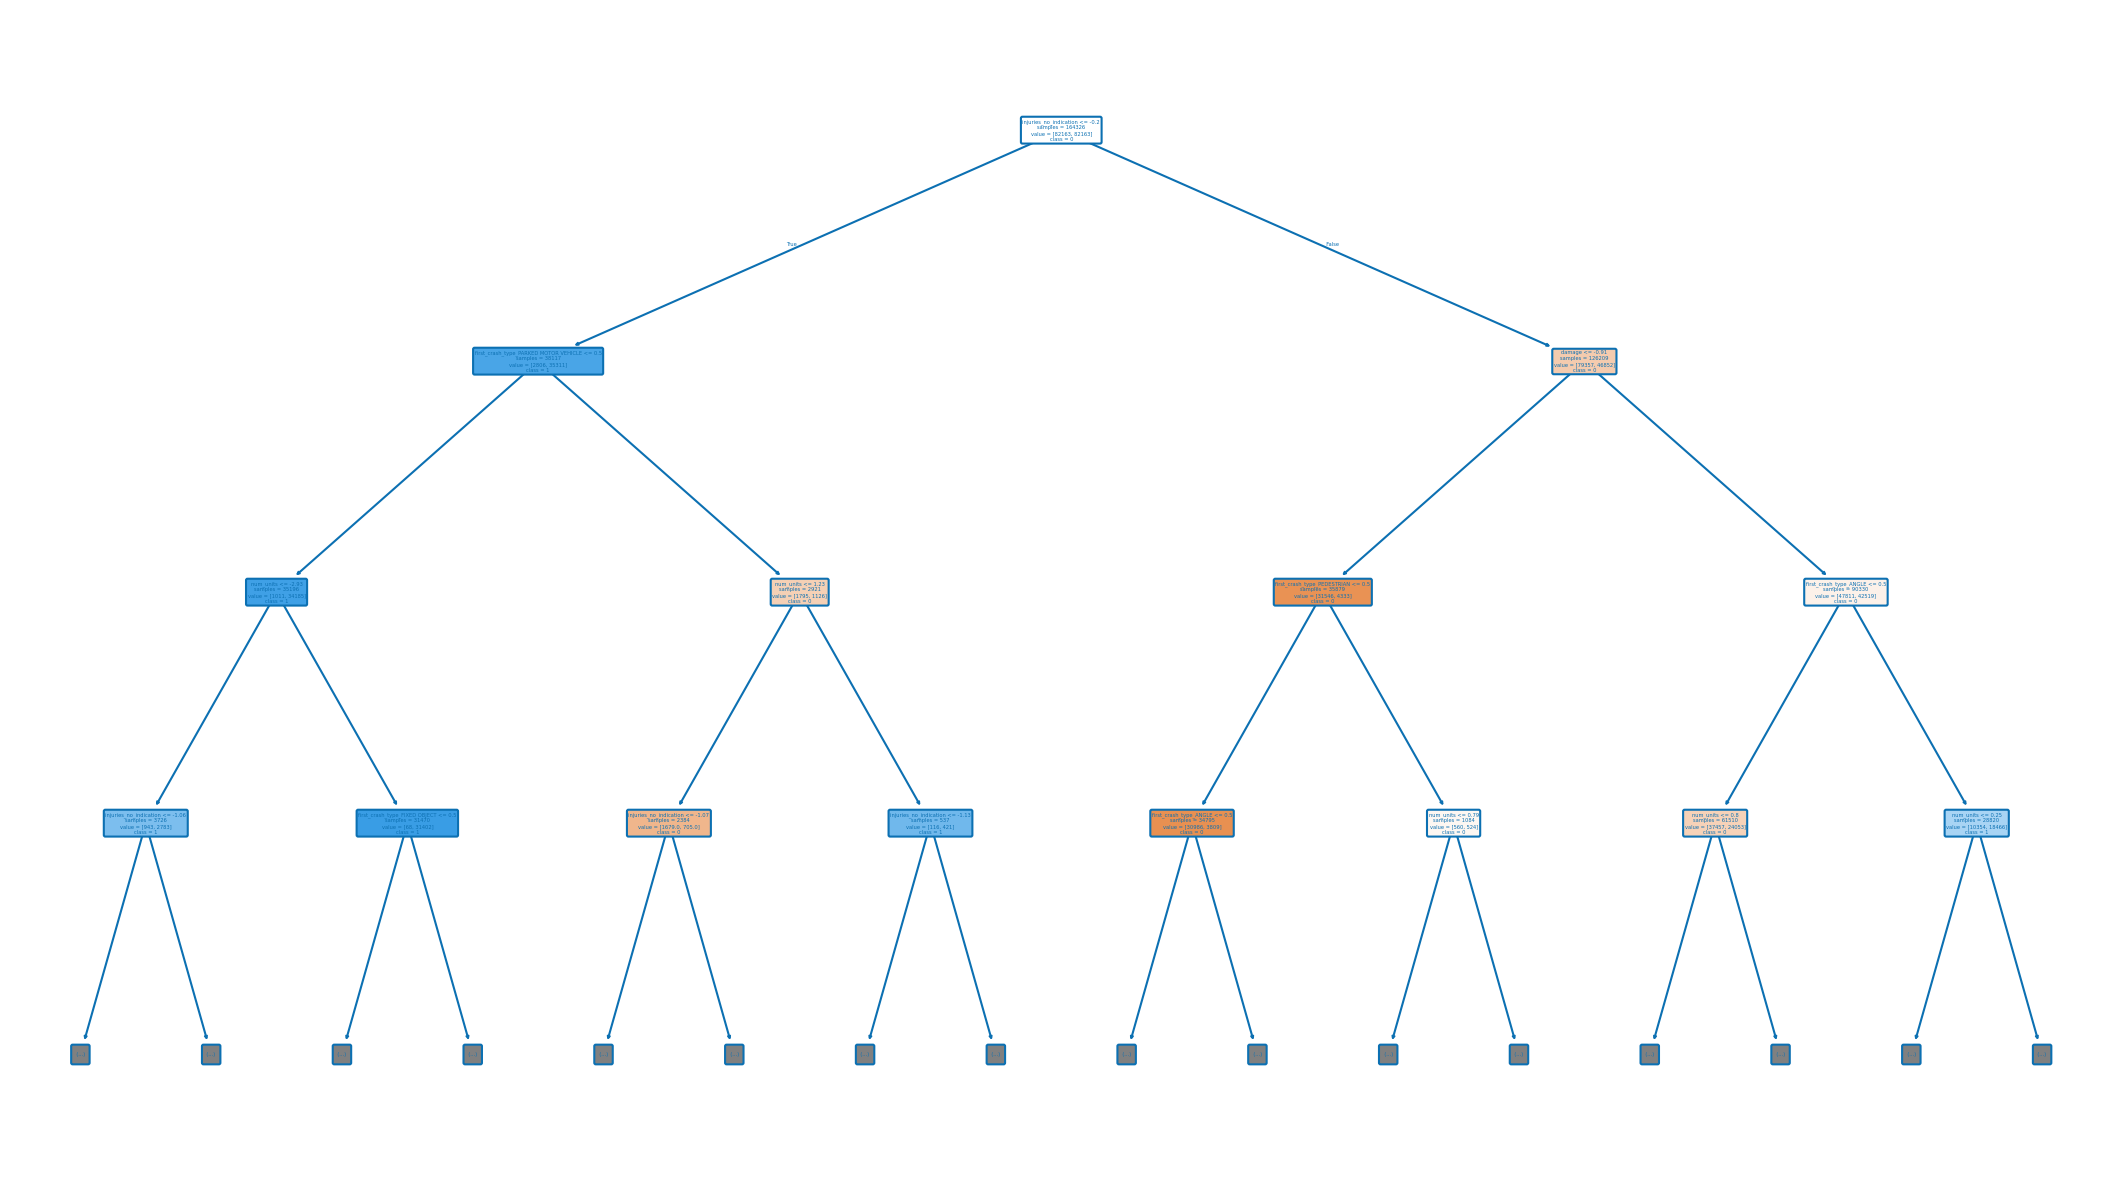

1. injuries_no_indication (0.47651124416958934)
2. damage (0.16096938664262495)
3. num_units (0.06486885116039061)
4. first_crash_type_ANGLE (0.06230413453110349)
5. first_crash_type_PARKED MOTOR VEHICLE (0.04539307400040177)
6. first_crash_type_TURNING (0.034272656940036395)
7. crash_date (0.02514731422923793)
8. crash_hour (0.015519674856112407)
9. prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY (0.012294378654491248)
10. prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS (0.012022257553838548)
11. first_crash_type_PEDESTRIAN (0.01057784486474667)
12. first_crash_type_FIXED OBJECT (0.009157519728249146)
13. first_crash_type_HEAD ON (0.006644007586381855)
14. weather_condition_UNKNOWN (0.006260195424992136)
15. crash_month (0.005374317384545831)
16. prim_contributory_cause_FAILING TO REDUCE SPEED TO AVOID CRASH (0.0050173862247208266)
17. lighting_condition_DARKNESS, LIGHTED ROAD (0.004407226260863829)
18. first_crash_type_PEDALCYCLIST (0.0034101761772917945)
19. crash_day_of_

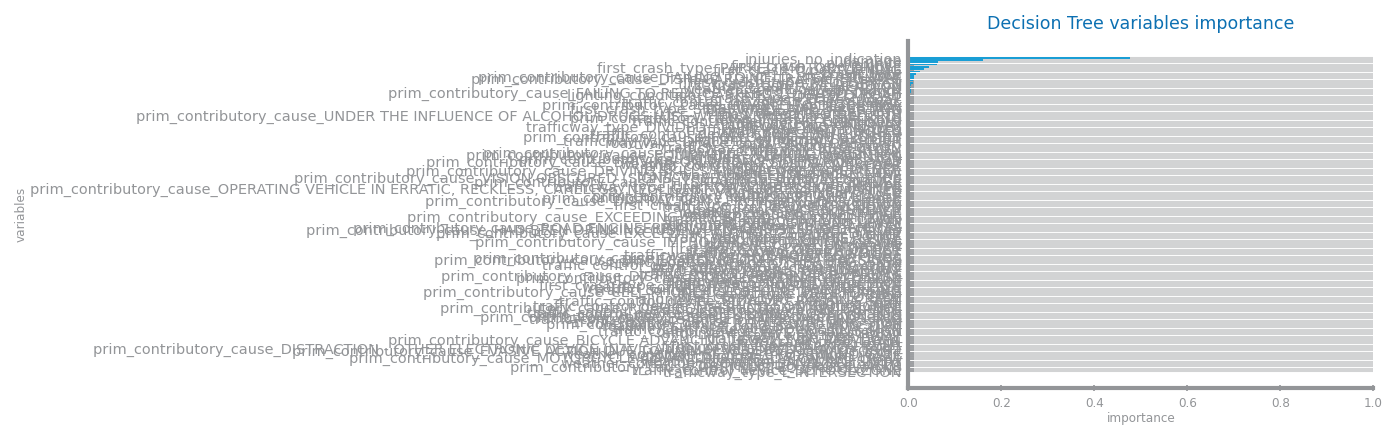

In [9]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    dt_best_model, dt_params = run_all_dt(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        d_max=25,
        lag=1,
        eval_metric = el
    )
    show_tree_and_importances_dt(
        features, target, dt_best_model, dt_params,
        lab_folder, file_tag, approach,
        max_depth2show=3
    )
    

In [10]:
print(dt_best_model)
print(dt_params)

DecisionTreeClassifier(max_depth=13, min_impurity_decrease=0)
{'name': 'DT', 'metric': 'f1', 'params': ('gini', 13)}


In [ ]:
# DecisionTreeClassifier(max_depth=13, min_impurity_decrease=0)
# {'name': 'DT', 'metric': 'f1', 'params': ('gini', 13)}

**MLP ANALYSIS - TRAFFIC DATA**

MLP best for 2500 iterations (lr_type=constant and lr=0.005


<Figure size 600x450 with 0 Axes>

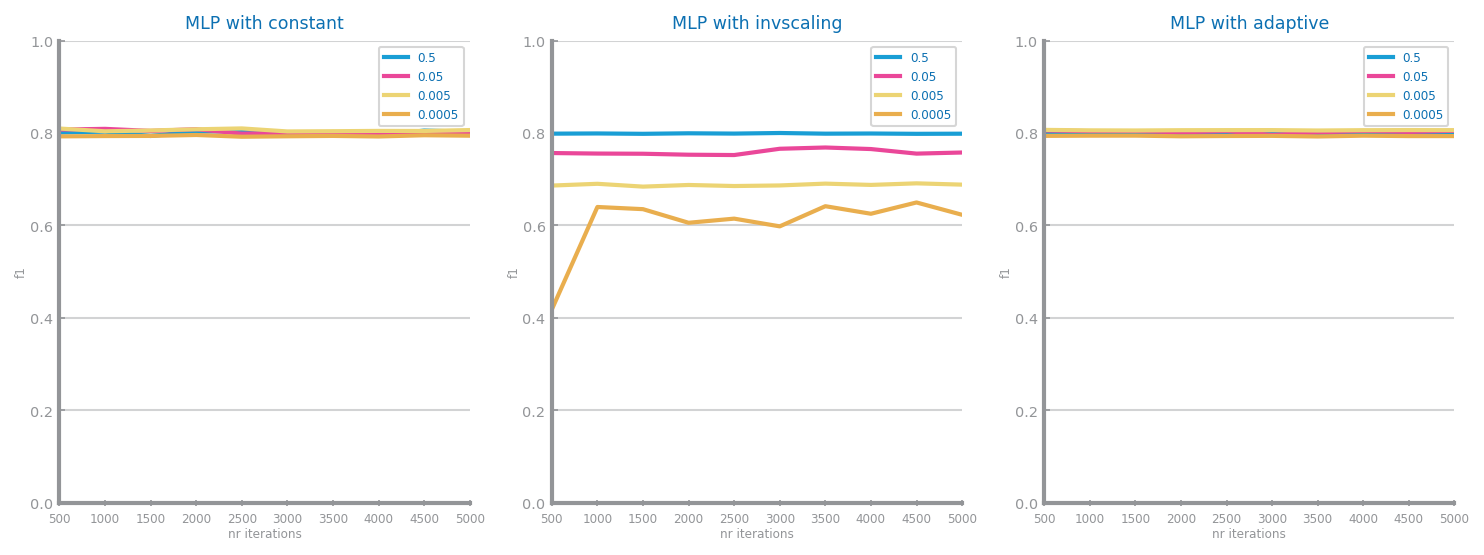

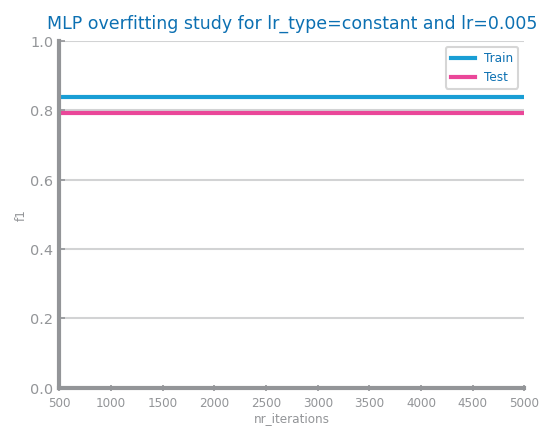

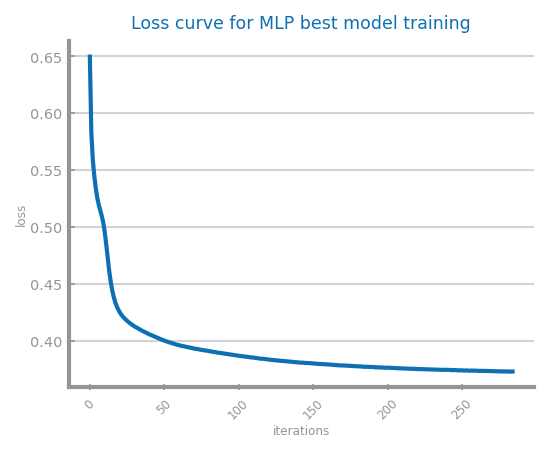

<Figure size 600x450 with 0 Axes>

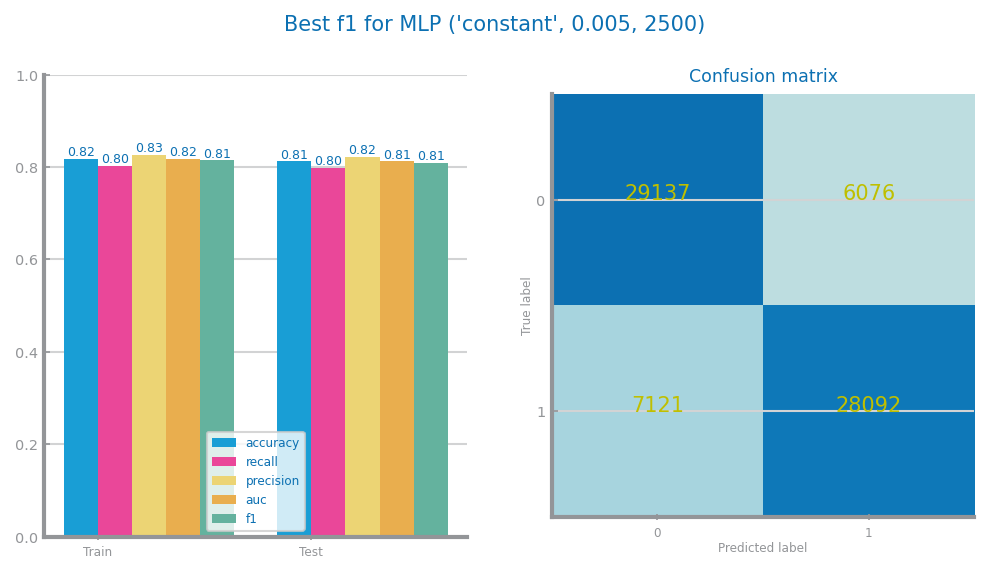

In [13]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    mlp_best_model, mlp_params = run_all_mlp(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_iterations=5000,
        lag=500,
        eval_metric = el
    )

In [14]:
print(mlp_best_model)
print(mlp_params)

MLPClassifier(activation='logistic', learning_rate_init=0.005, max_iter=500,
              solver='sgd', warm_start=True)
{'name': 'MLP', 'metric': 'f1', 'params': ('constant', 0.005, 2500)}


In [ ]:
# MLPClassifier(activation='logistic', learning_rate_init=0.005, max_iter=500,
#               solver='sgd', warm_start=True)
# {'name': 'MLP', 'metric': 'f1', 'params': ('constant', 0.005, 2500)}

**KNN ANALYSIS - TRAFFIC DATA**

KNN best with k=19 and manhattan


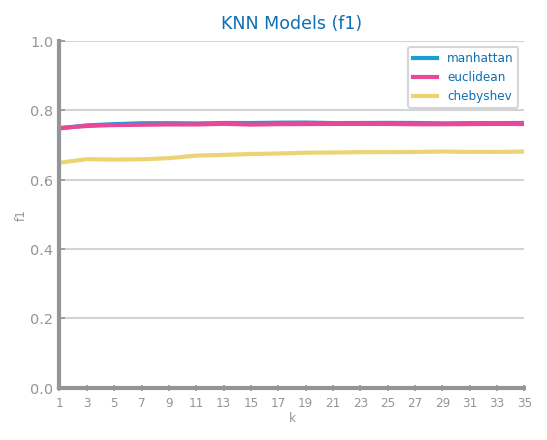

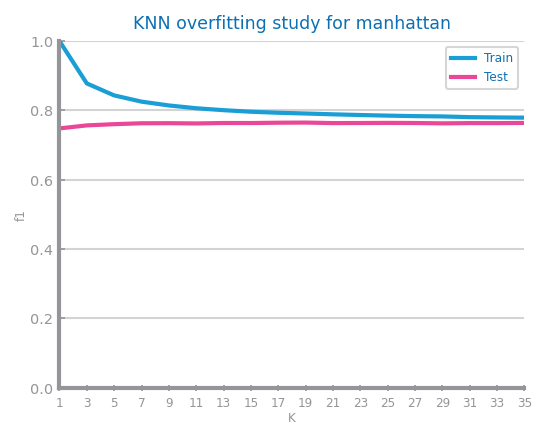

<Figure size 600x450 with 0 Axes>

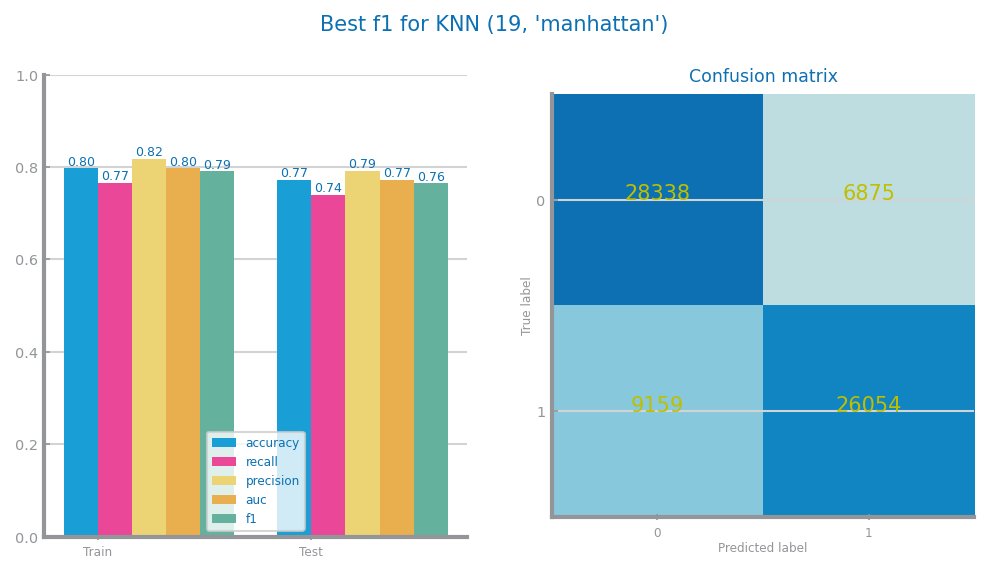

In [11]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    knn_best_model, knn_params = run_all_knn(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        k_max=35,
        lag=2,
        eval_metric = el
    )

In [12]:
print(knn_best_model)
print(knn_params)

KNeighborsClassifier(metric='manhattan', n_neighbors=19)
{'name': 'KNN', 'metric': 'f1', 'params': (19, 'manhattan')}


In [ ]:
# KNeighborsClassifier(metric='manhattan', n_neighbors=19)
# {'name': 'KNN', 'metric': 'f1', 'params': (19, 'manhattan')}

**RANDOM FORESTS - TRAFFIC DATA**

RF best for 100 trees (d=7 and f=0.9)


<Figure size 600x450 with 0 Axes>

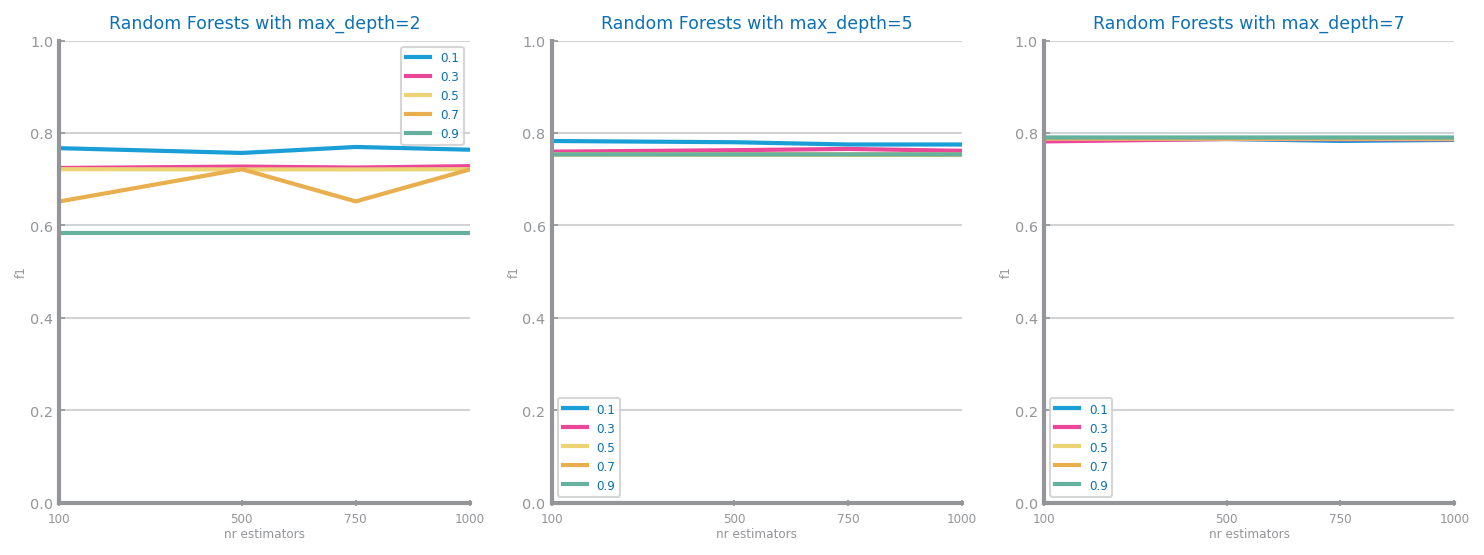

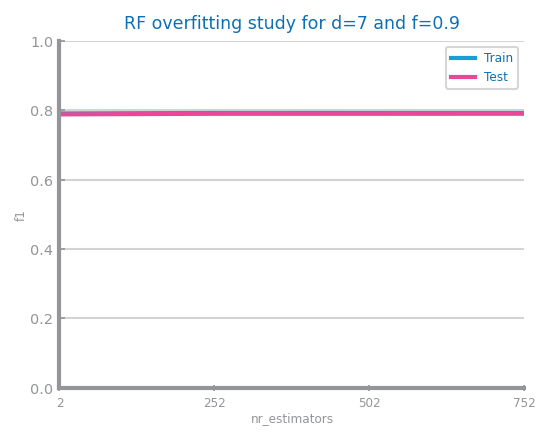

<Figure size 600x450 with 0 Axes>

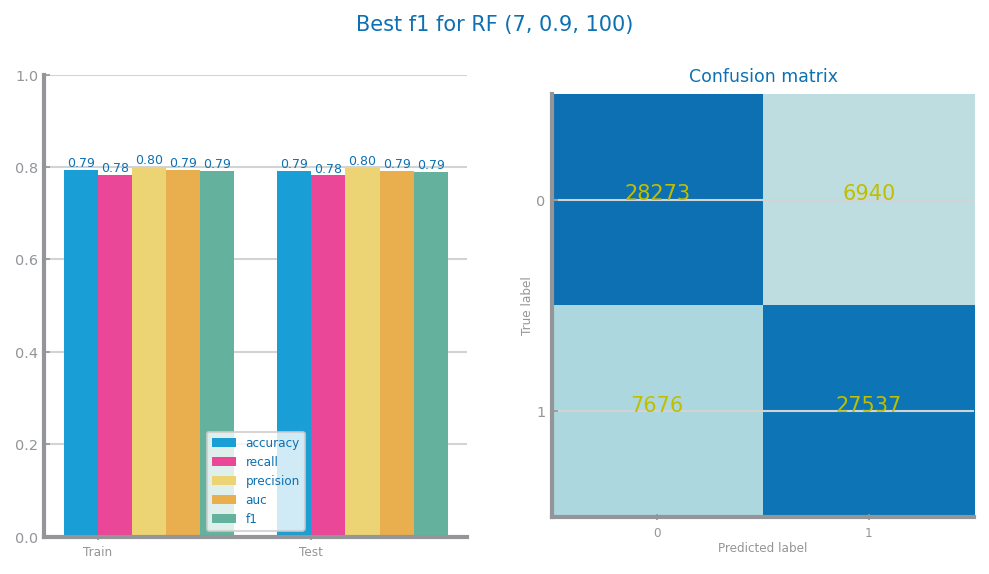

1. injuries_no_indication (0.518257854505581)
2. damage (0.17528564767975852)
3. first_crash_type_ANGLE (0.07402190755075298)
4. num_units (0.07201841081744469)
5. first_crash_type_PARKED MOTOR VEHICLE (0.051598849734382016)
6. first_crash_type_TURNING (0.03477077905504347)
7. prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY (0.012797720329810162)
8. prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS (0.012066190458553123)
9. first_crash_type_FIXED OBJECT (0.009720731299467862)
10. first_crash_type_PEDESTRIAN (0.009210257335336045)
11. crash_date (0.009175945080015227)
12. first_crash_type_HEAD ON (0.005540280376396908)
13. first_crash_type_PEDALCYCLIST (0.0022426820704763606)
14. weather_condition_UNKNOWN (0.002044442099650856)
15. lighting_condition_DARKNESS, LIGHTED ROAD (0.00197149632601642)
16. crash_hour (0.0016690657936271598)
17. first_crash_type_REAR END (0.0015611337490155145)
18. first_crash_type_SIDESWIPE SAME DIRECTION (0.0009990024880999324)
19. road_defect_RUT, HO

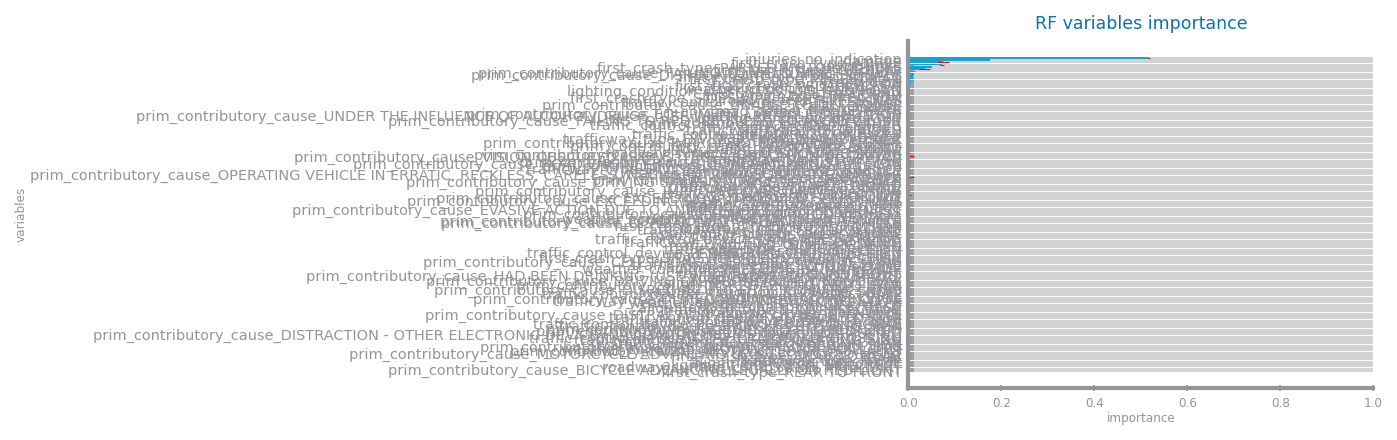

In [15]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    rf_best_model, rf_params = run_all_rf(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_trees=1000,
        lag=250,
        eval_metric = el
    )
    show_importances_rf(features,
        rf_best_model, rf_params,
        lab_folder, file_tag, approach
    )

In [16]:
print(rf_best_model)
print(rf_params)

RandomForestClassifier(max_depth=7, max_features=0.9)
{'name': 'RF', 'metric': 'f1', 'params': (7, 0.9, 100)}


In [ ]:
# RandomForestClassifier(max_depth=7, max_features=0.9)
# {'name': 'RF', 'metric': 'f1', 'params': (7, 0.9, 100)}

**GRADIENT BOOSTING OR XGBOOST - TRAFFIC DATA**

GB best for 750 trees (d=5 and lr=0.1


<Figure size 600x450 with 0 Axes>

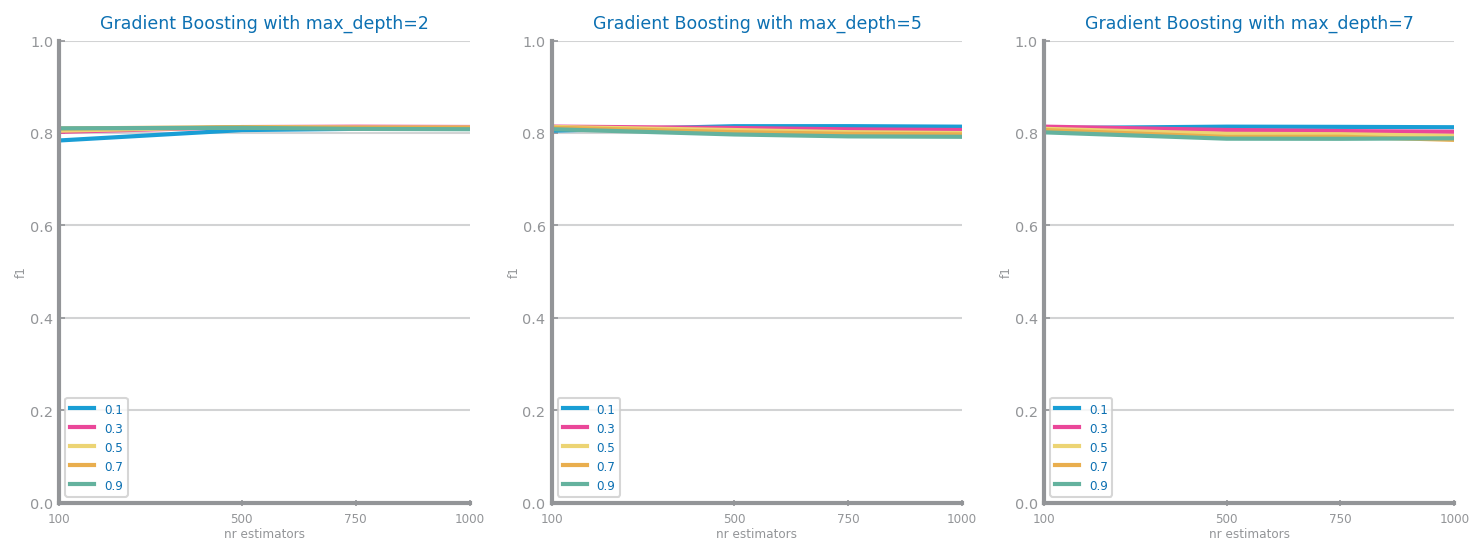

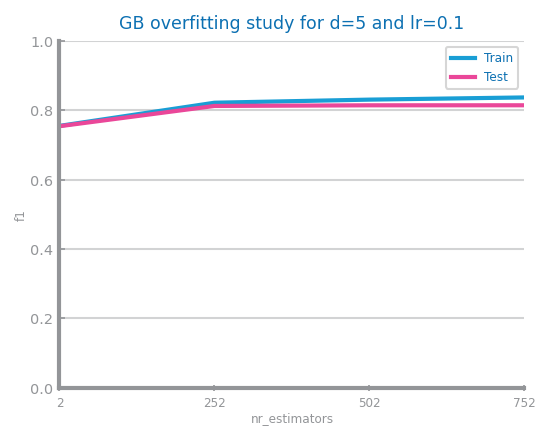

<Figure size 600x450 with 0 Axes>

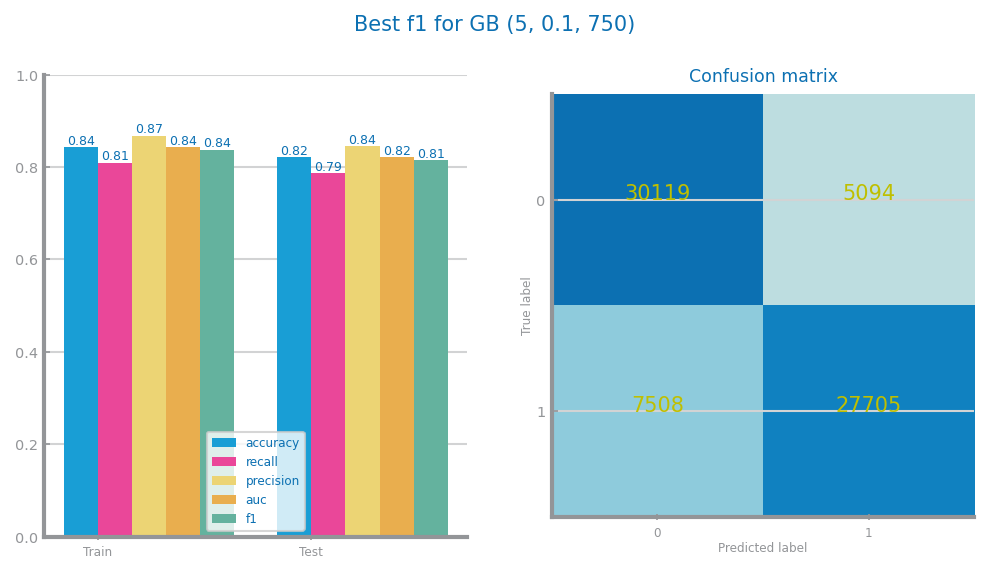

1. injuries_no_indication (0.4610225824217657)
2. damage (0.14947314492874667)
3. num_units (0.060873950778708476)
4. first_crash_type_ANGLE (0.05077513889024372)
5. first_crash_type_PARKED MOTOR VEHICLE (0.04244561703410771)
6. crash_date (0.03024419088280616)
7. first_crash_type_TURNING (0.022632433489331815)
8. crash_hour (0.018769678753296947)
9. prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY (0.016312570489533162)
10. prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS (0.013423583511795139)
11. first_crash_type_SIDESWIPE SAME DIRECTION (0.01179301685599683)
12. crash_day_of_week (0.01156939695155883)
13. first_crash_type_REAR END (0.009611083766872768)
14. crash_month (0.008175915738255138)
15. first_crash_type_PEDESTRIAN (0.007457827095656114)
16. lighting_condition_DARKNESS, LIGHTED ROAD (0.006865007473716271)
17. weather_condition_UNKNOWN (0.005939924457654605)
18. first_crash_type_FIXED OBJECT (0.005511315435138579)
19. road_defect_NO DEFECTS (0.0045846034804535194)
2

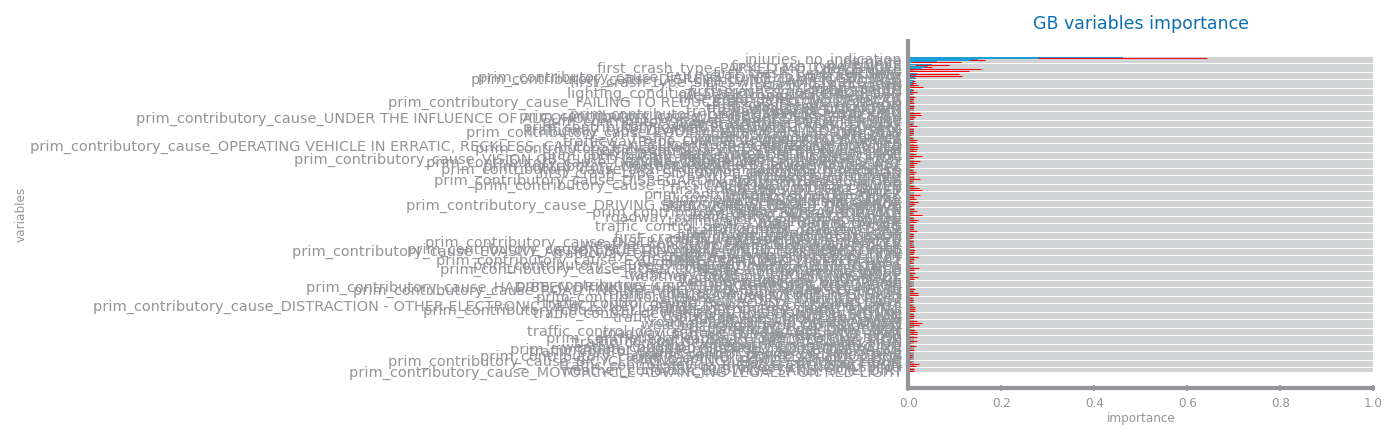

In [17]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    gb_best_model, gb_params = run_all_gb(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_trees=1000,
        lag=250,
        eval_metric = el
    )
    show_importances_gb(features,
        gb_best_model, gb_params,
        lab_folder, file_tag, approach
    )


In [18]:
print(gb_best_model)
print(gb_params)

GradientBoostingClassifier(max_depth=5, n_estimators=750)
{'name': 'GB', 'metric': 'f1', 'params': (5, 0.1, 750)}


In [ ]:
# GradientBoostingClassifier(max_depth=5, n_estimators=750)
# {'name': 'GB', 'metric': 'f1', 'params': (5, 0.1, 750)}